# Import Libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection

In [237]:
df = pd.read_csv('greendestination.csv')

In [238]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [239]:
df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1141,30,No,Travel_Rarely,241,Research & Development,7,3,Medical,1,1609,2,Male,48,2,1,Research Scientist,2,Married,2141,5348,1,Y,No,12,3,2,80,1,6,3,2,6,4,1,1
596,35,No,Travel_Rarely,1258,Research & Development,1,4,Life Sciences,1,826,4,Female,40,4,1,Research Scientist,3,Single,2506,13301,3,Y,No,13,3,3,80,0,7,0,3,2,2,2,2
1378,42,No,Travel_Rarely,419,Sales,12,4,Marketing,1,1943,2,Male,77,3,2,Sales Executive,4,Divorced,5087,2900,3,Y,Yes,12,3,3,80,2,14,4,3,0,0,0,0


In [240]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [241]:
df.columns = [
    ''.join(['_' + c.lower() if c.isupper() else c for c in col]).lstrip('_') 
    for col in df.columns
]
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   education_field             1470 non-null   object
 8   employee_count              1470 non-null   int64 
 9   employee_number             1470 non-null   int64 
 10  environment_satisfaction    1470 non-null   int64 
 11  gender                      1470 non-null   object
 12  hourly_rate                 1470 non-null   int64 
 13  job_involvement             1470 non-null   int6

In [243]:
df.isnull().sum()

age                           0
attrition                     0
business_travel               0
daily_rate                    0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over18                        0
over_time                     0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at

# Exploratory Data Analysis

In [244]:
df.describe(include='all', percentiles=[0.2, 0.4, 0.6, 0.8])

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
20%,29.000000,NaN,NaN,391.800000,NaN,2.000000,2.000000,NaN,1.0,402.600000,2.000000,NaN,45.000000,2.000000,1.000000,NaN,2.000000,NaN,2695.800000,6887.400000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000
40%,34.000000,NaN,NaN,656.200000,NaN,5.000000,3.000000,NaN,1.0,814.200000,3.000000,NaN,59.000000,3.000000,2.000000,NaN,3.000000,NaN,4228.800000,11773.000000,1.000000,NaN,NaN,13.000000,3.000000,3.000000,80.0,0.000000,8.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000


In [245]:
df.shape

(1470, 35)

In [246]:
numerical_columns = [var for var in df.columns if df[var].dtype !='O']
print('There are {} numerical columns\n'.format(len(numerical_columns)))
print(numerical_columns)

There are 26 numerical columns

['age', 'daily_rate', 'distance_from_home', 'education', 'employee_count', 'employee_number', 'environment_satisfaction', 'hourly_rate', 'job_involvement', 'job_level', 'job_satisfaction', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'performance_rating', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']


In [247]:
categorical_columns = [var for var in df.columns if df[var].dtype =='O']
print('There are {} categorical columns\n'.format(len(categorical_columns)))
print(categorical_columns)

There are 9 categorical columns

['attrition', 'business_travel', 'department', 'education_field', 'gender', 'job_role', 'marital_status', 'over18', 'over_time']


In [248]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding for binary categorical variables
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False, drop='first')

for column in categorical_columns:
     if column in df.columns:
          unique_values = df[column].unique()
          print(f"Column: {column}")
          print(unique_values, '\n')
          if df[column].nunique() == 2:
               print(f'{column} : {df[column].unique()}')
               df[column] = le.fit_transform(df[column])
               print(f'{column} : {df[column].unique()}')
          elif df[column].nunique() < 2 and df[column].unique() == 'Y':
               df[column] = 1
               print(f'{column} : {df[column].unique()}')
          else:
               print(f'{column} : {df[column].unique()}')
               encoded = ohe.fit_transform(df[[column]])
               df = df.drop(column, axis=1)
               df = pd.concat([df, pd.DataFrame(encoded, columns=ohe.get_feature_names_out([column]))], axis=1)
               print(f'{column} : {encoded}')
          print("."*100)
     else:
          print(f"Column '{column}' does not exist in the dataframe.")

Column: attrition
['Yes' 'No'] 

attrition : ['Yes' 'No']
attrition : [1 0]
....................................................................................................
Column: business_travel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

business_travel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
business_travel : [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
....................................................................................................
Column: department
['Sales' 'Research & Development' 'Human Resources'] 

department : ['Sales' 'Research & Development' 'Human Resources']
department : [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
....................................................................................................
Column: education_field
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

education_field : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Techni

In [249]:
def plot_distribution(data, columns):
    plt.figure(figsize=(15,4))
    sns.histplot(data[columns], kde=True)
    plt.title(f'Distribution of {columns}')
    col_mean = data[columns].mean()
    col_median = data[columns].median()
    col_std = data[columns].std()
    plt.axvline(col_mean, color='r', linestyle='--', label='Mean')
    plt.axvline(col_median, color='g', linestyle='--', label='Median')
    plt.axvline(col_mean + col_std, color='b', linestyle='--', label='Mean + 1SD')
    plt.axvline(col_mean - col_std, color='b', linestyle='--', label='Mean - 1SD')
    plt.axvline(col_mean + 2*col_std, color='y', linestyle='--', label='Mean + 2SD')
    plt.axvline(col_mean - 2*col_std, color='y', linestyle='--', label='Mean - 2SD')
    plt.legend()
    plt.show()

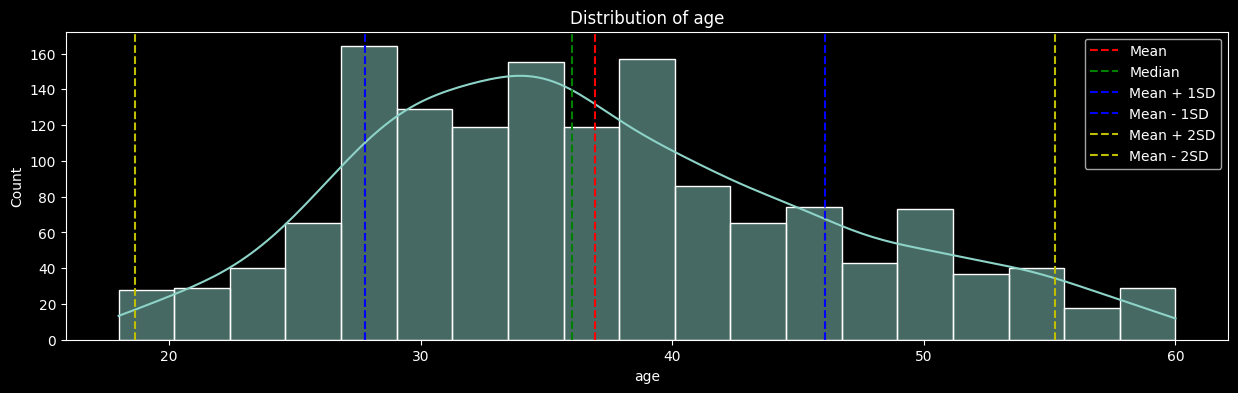

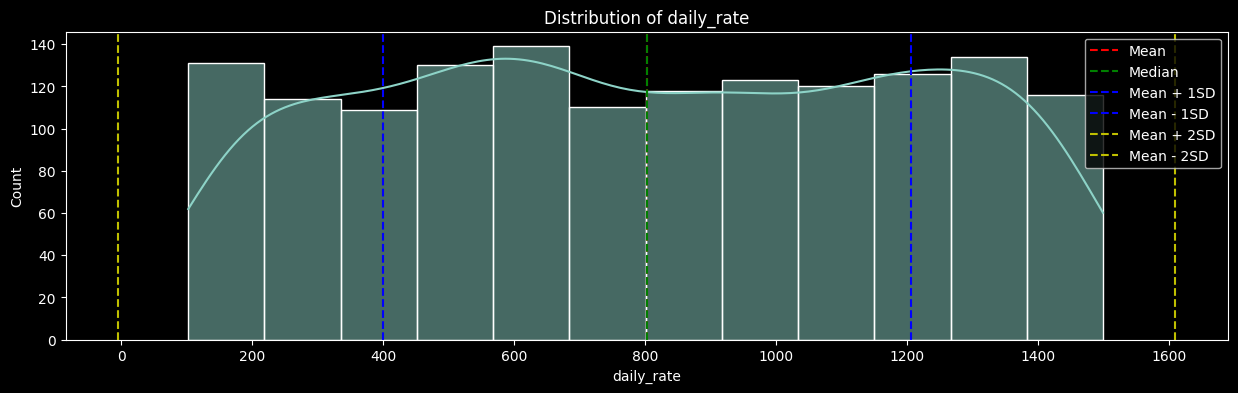

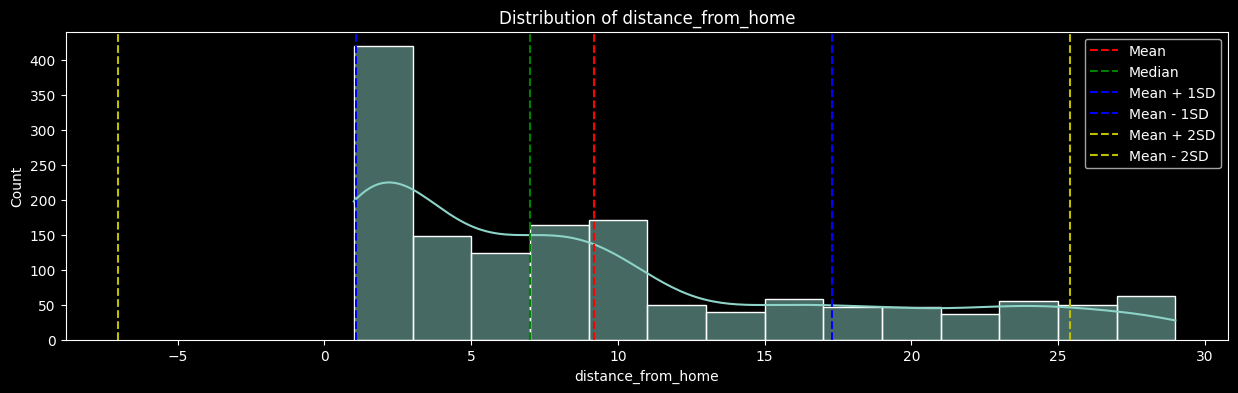

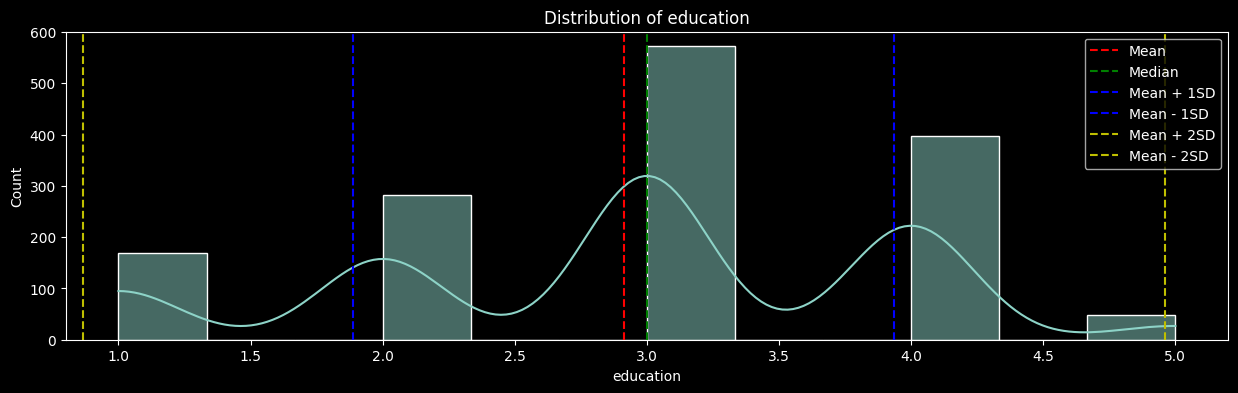

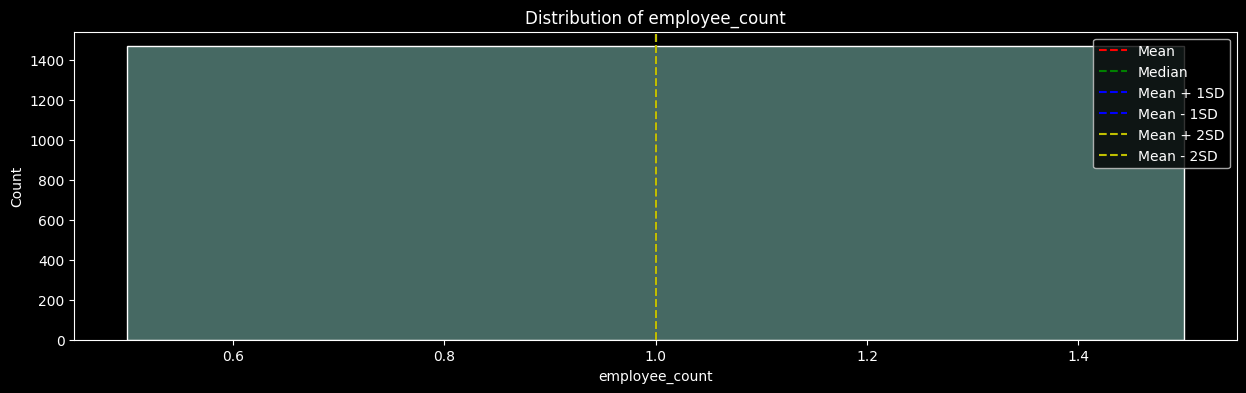

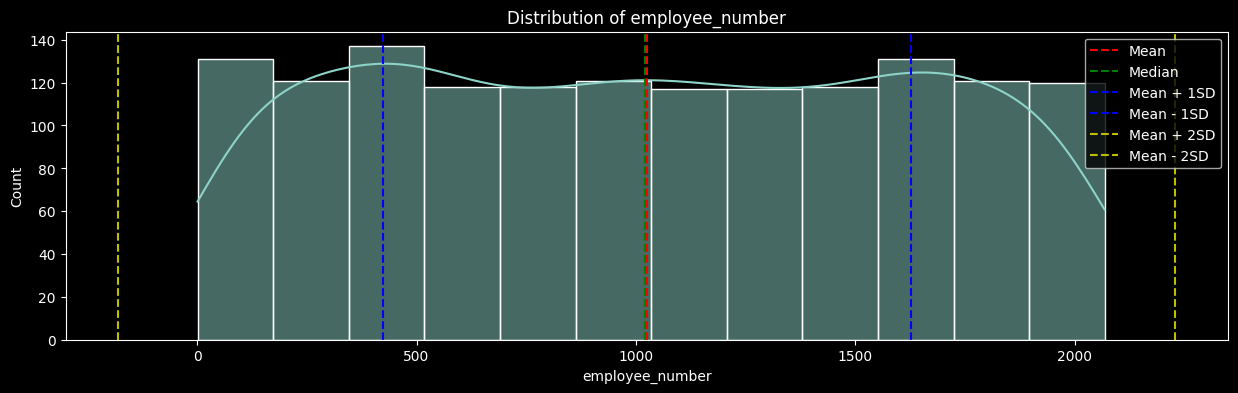

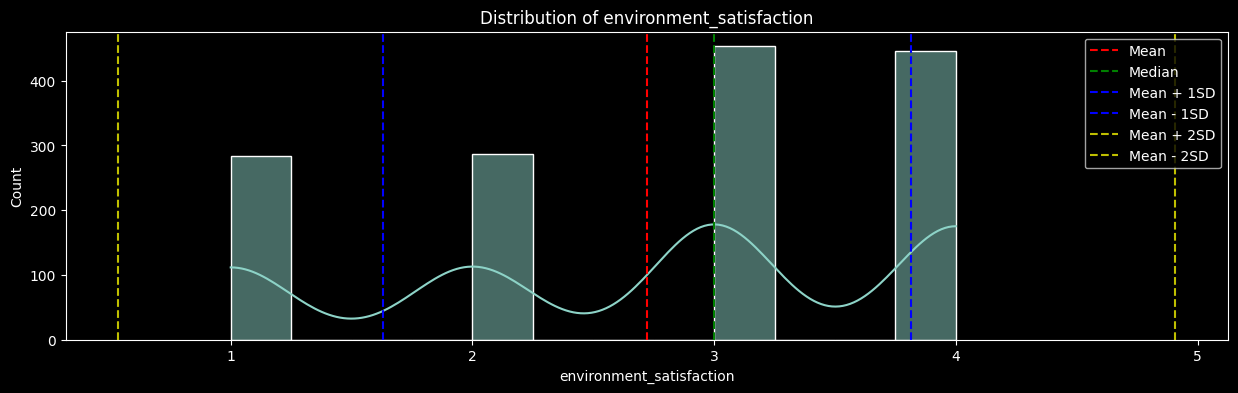

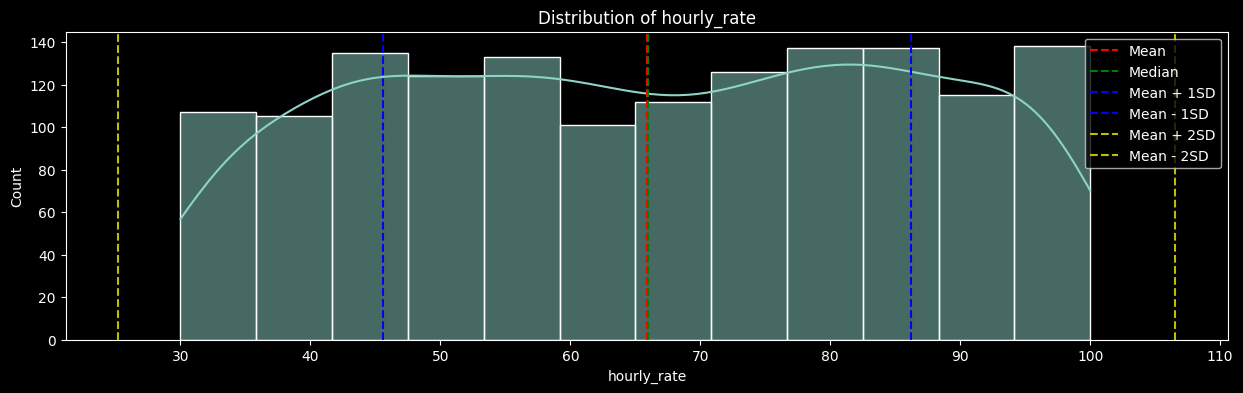

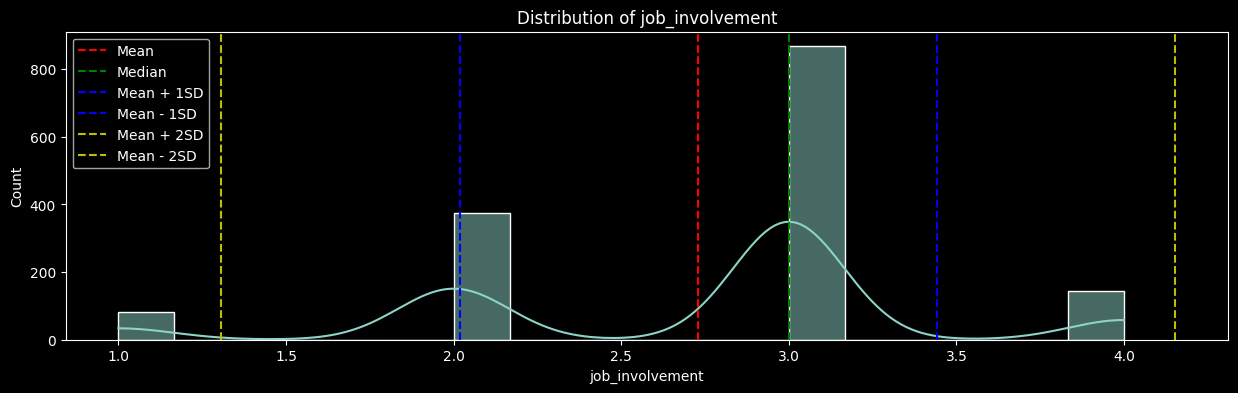

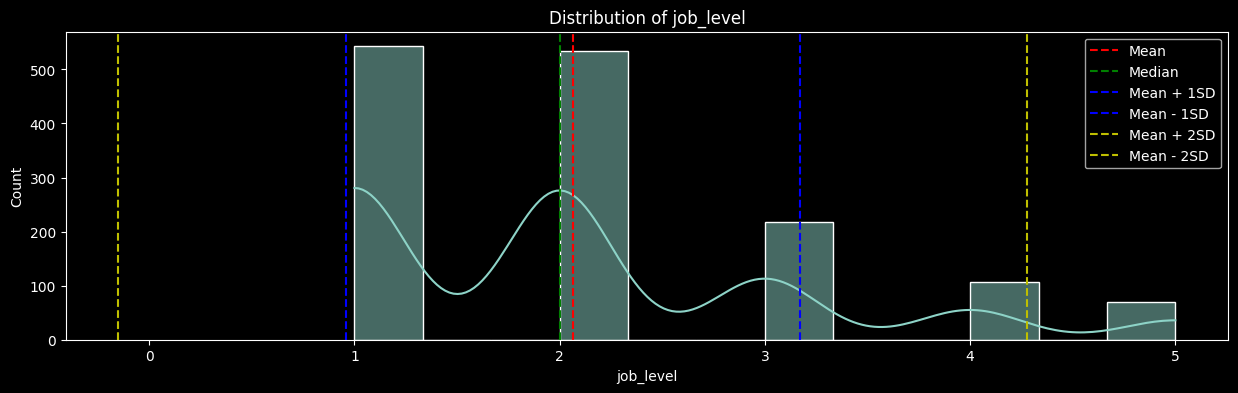

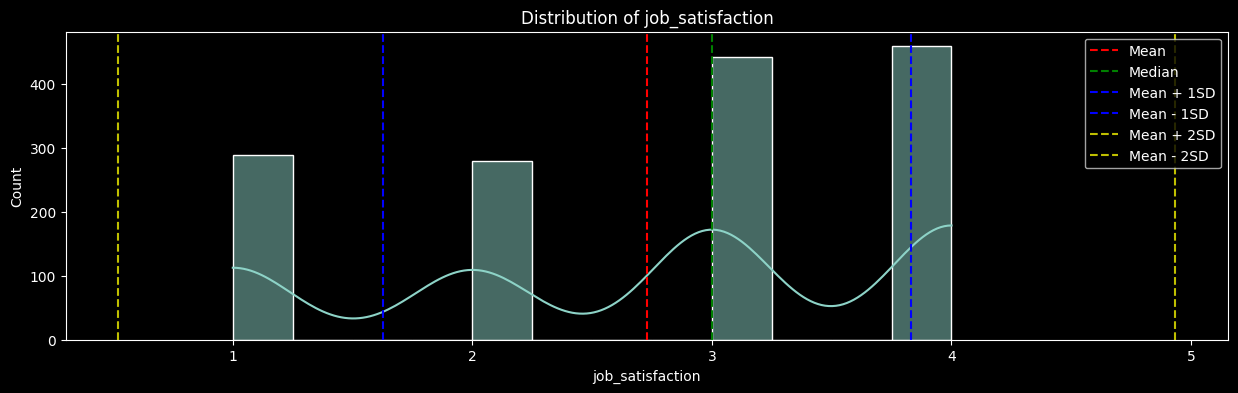

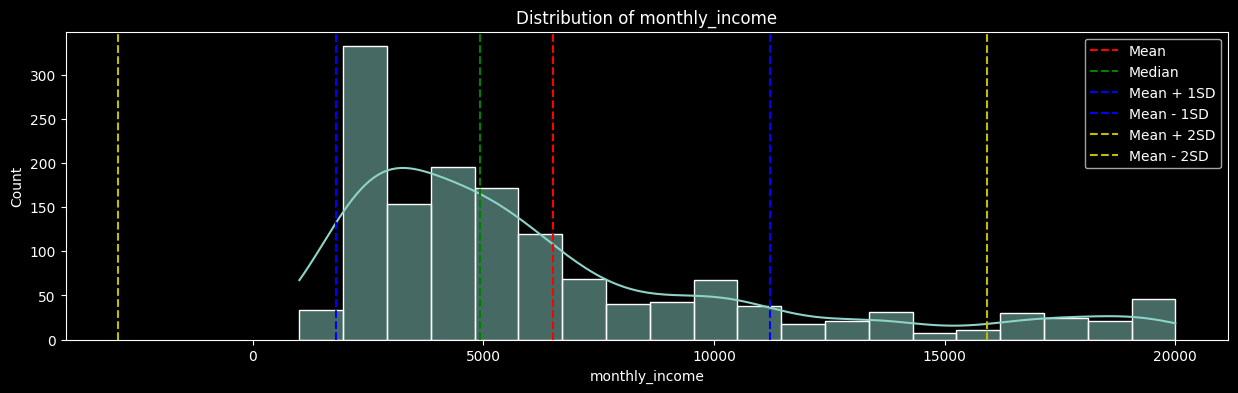

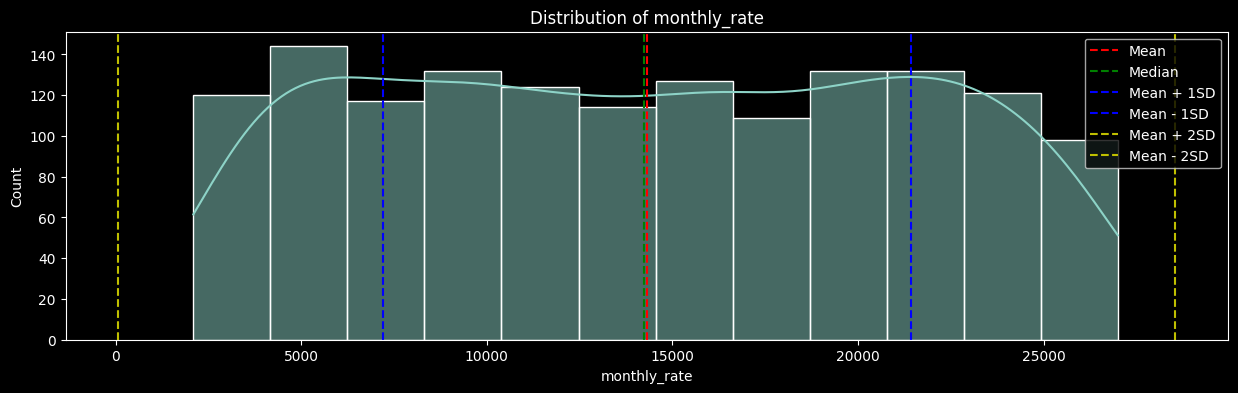

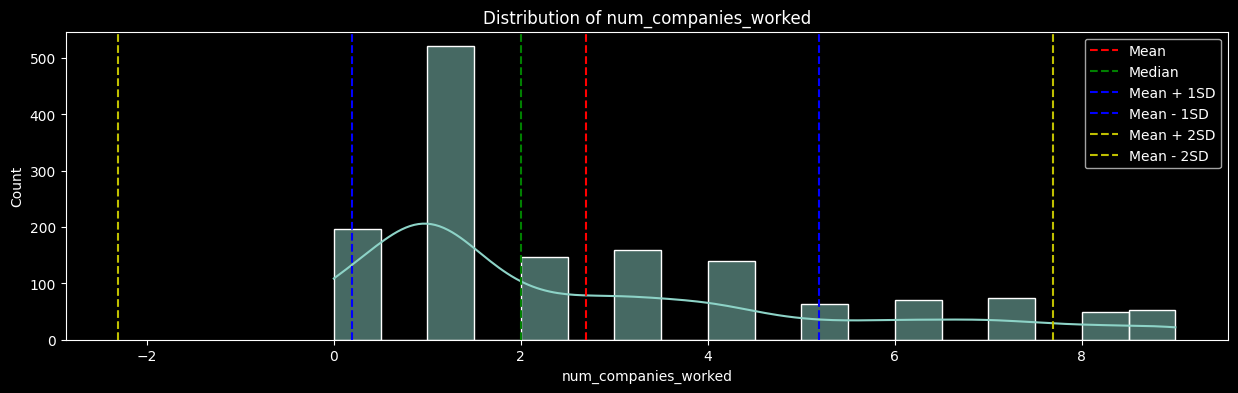

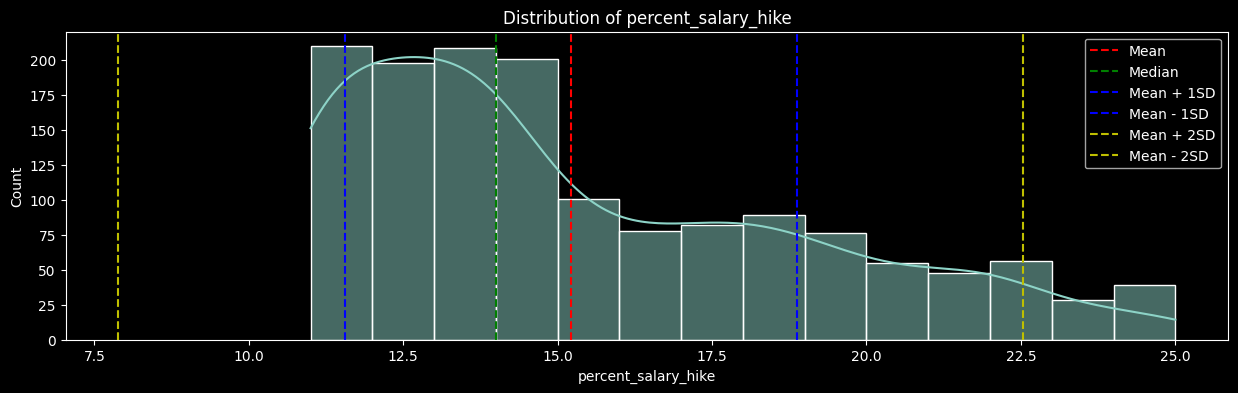

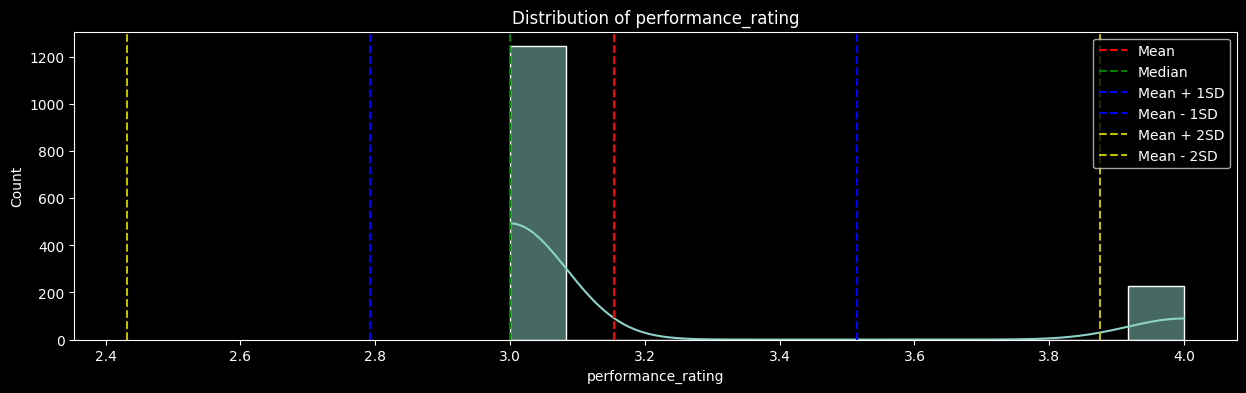

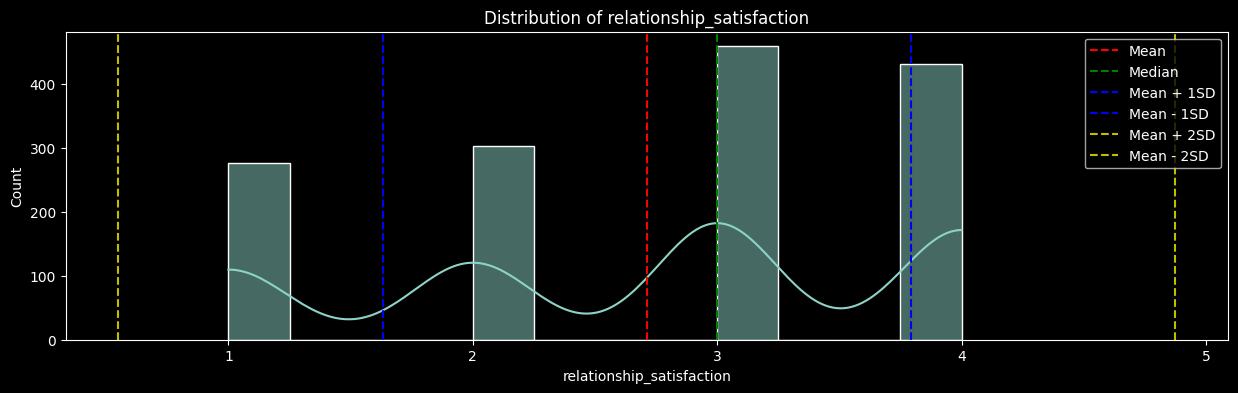

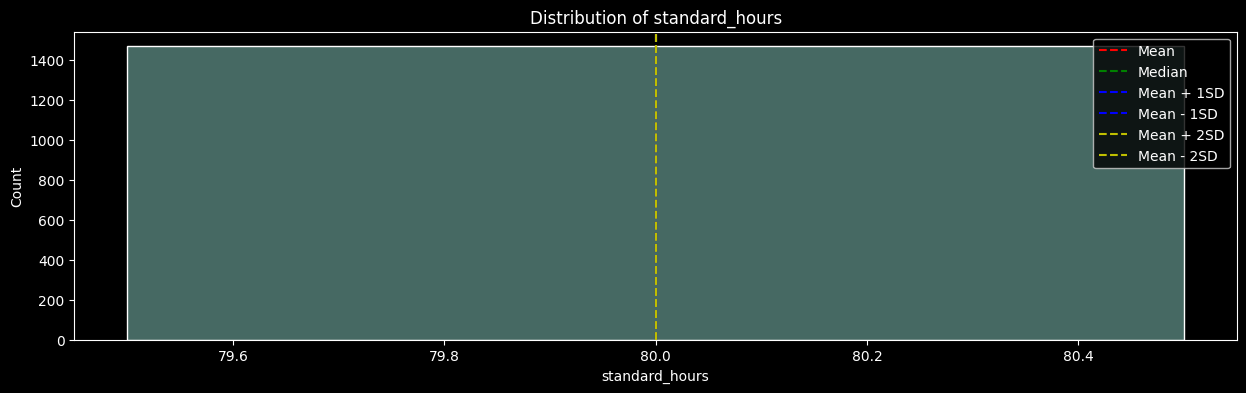

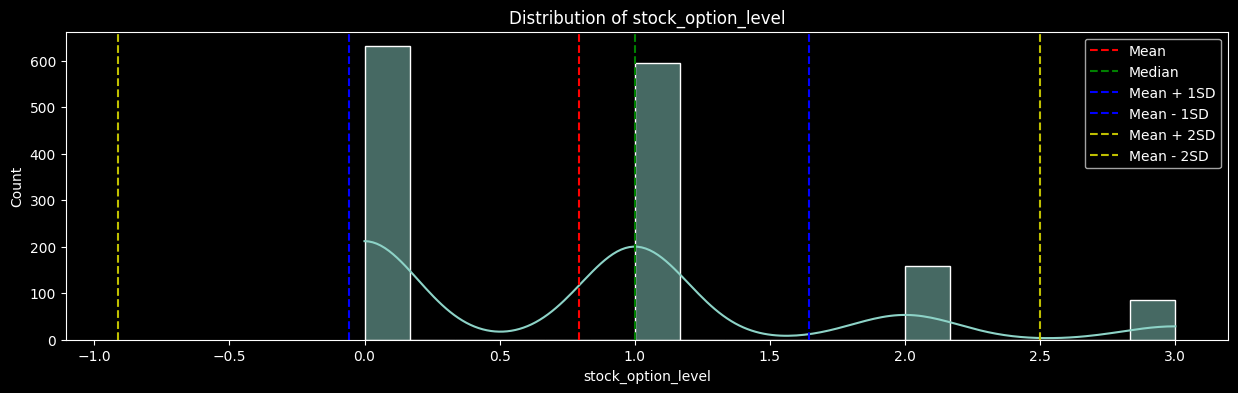

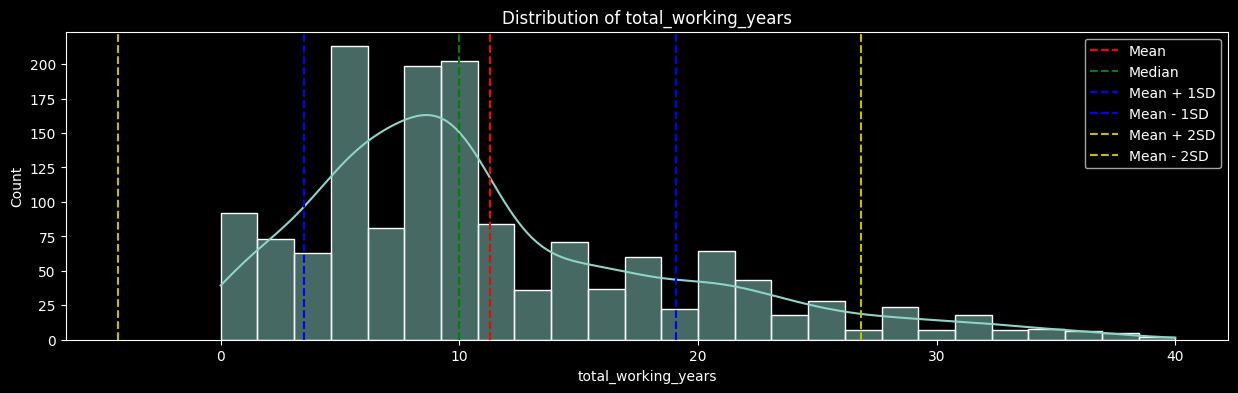

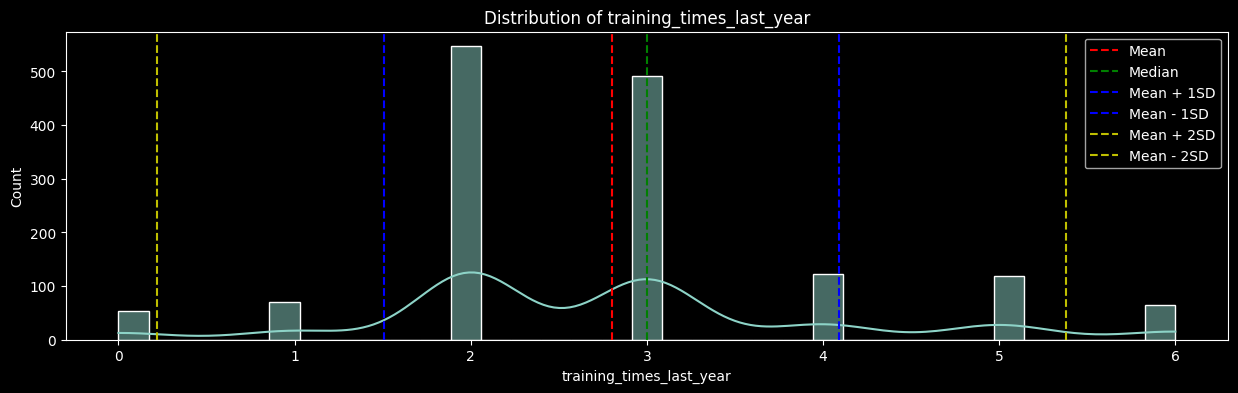

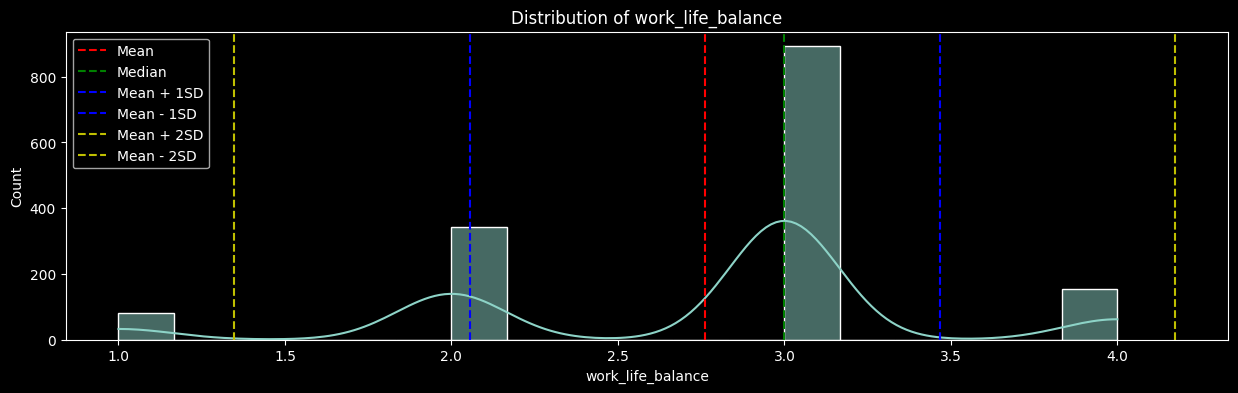

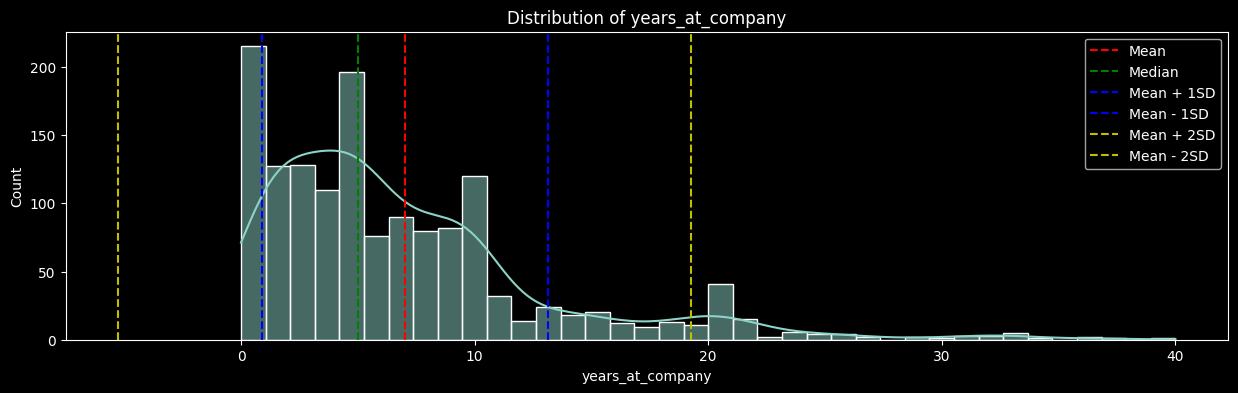

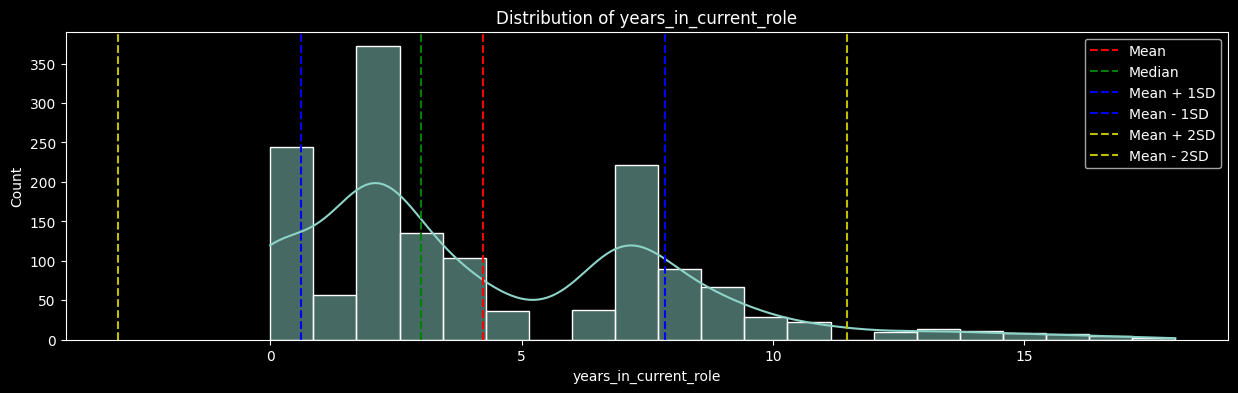

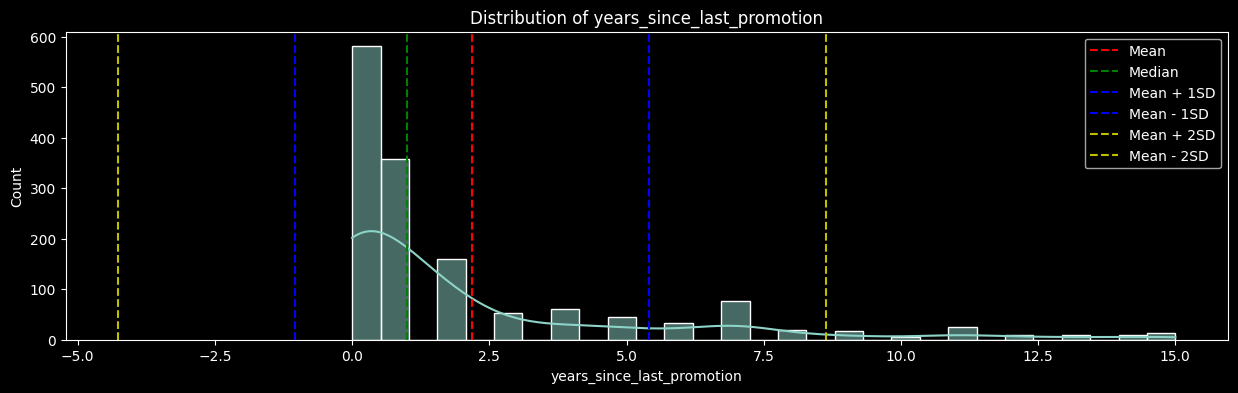

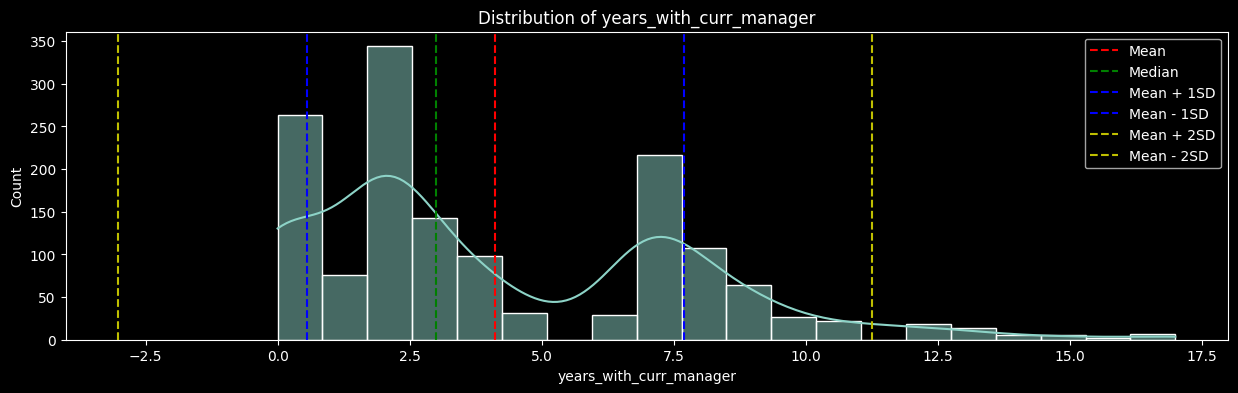

In [250]:
for column in numerical_columns:
     plot_distribution(df, column)

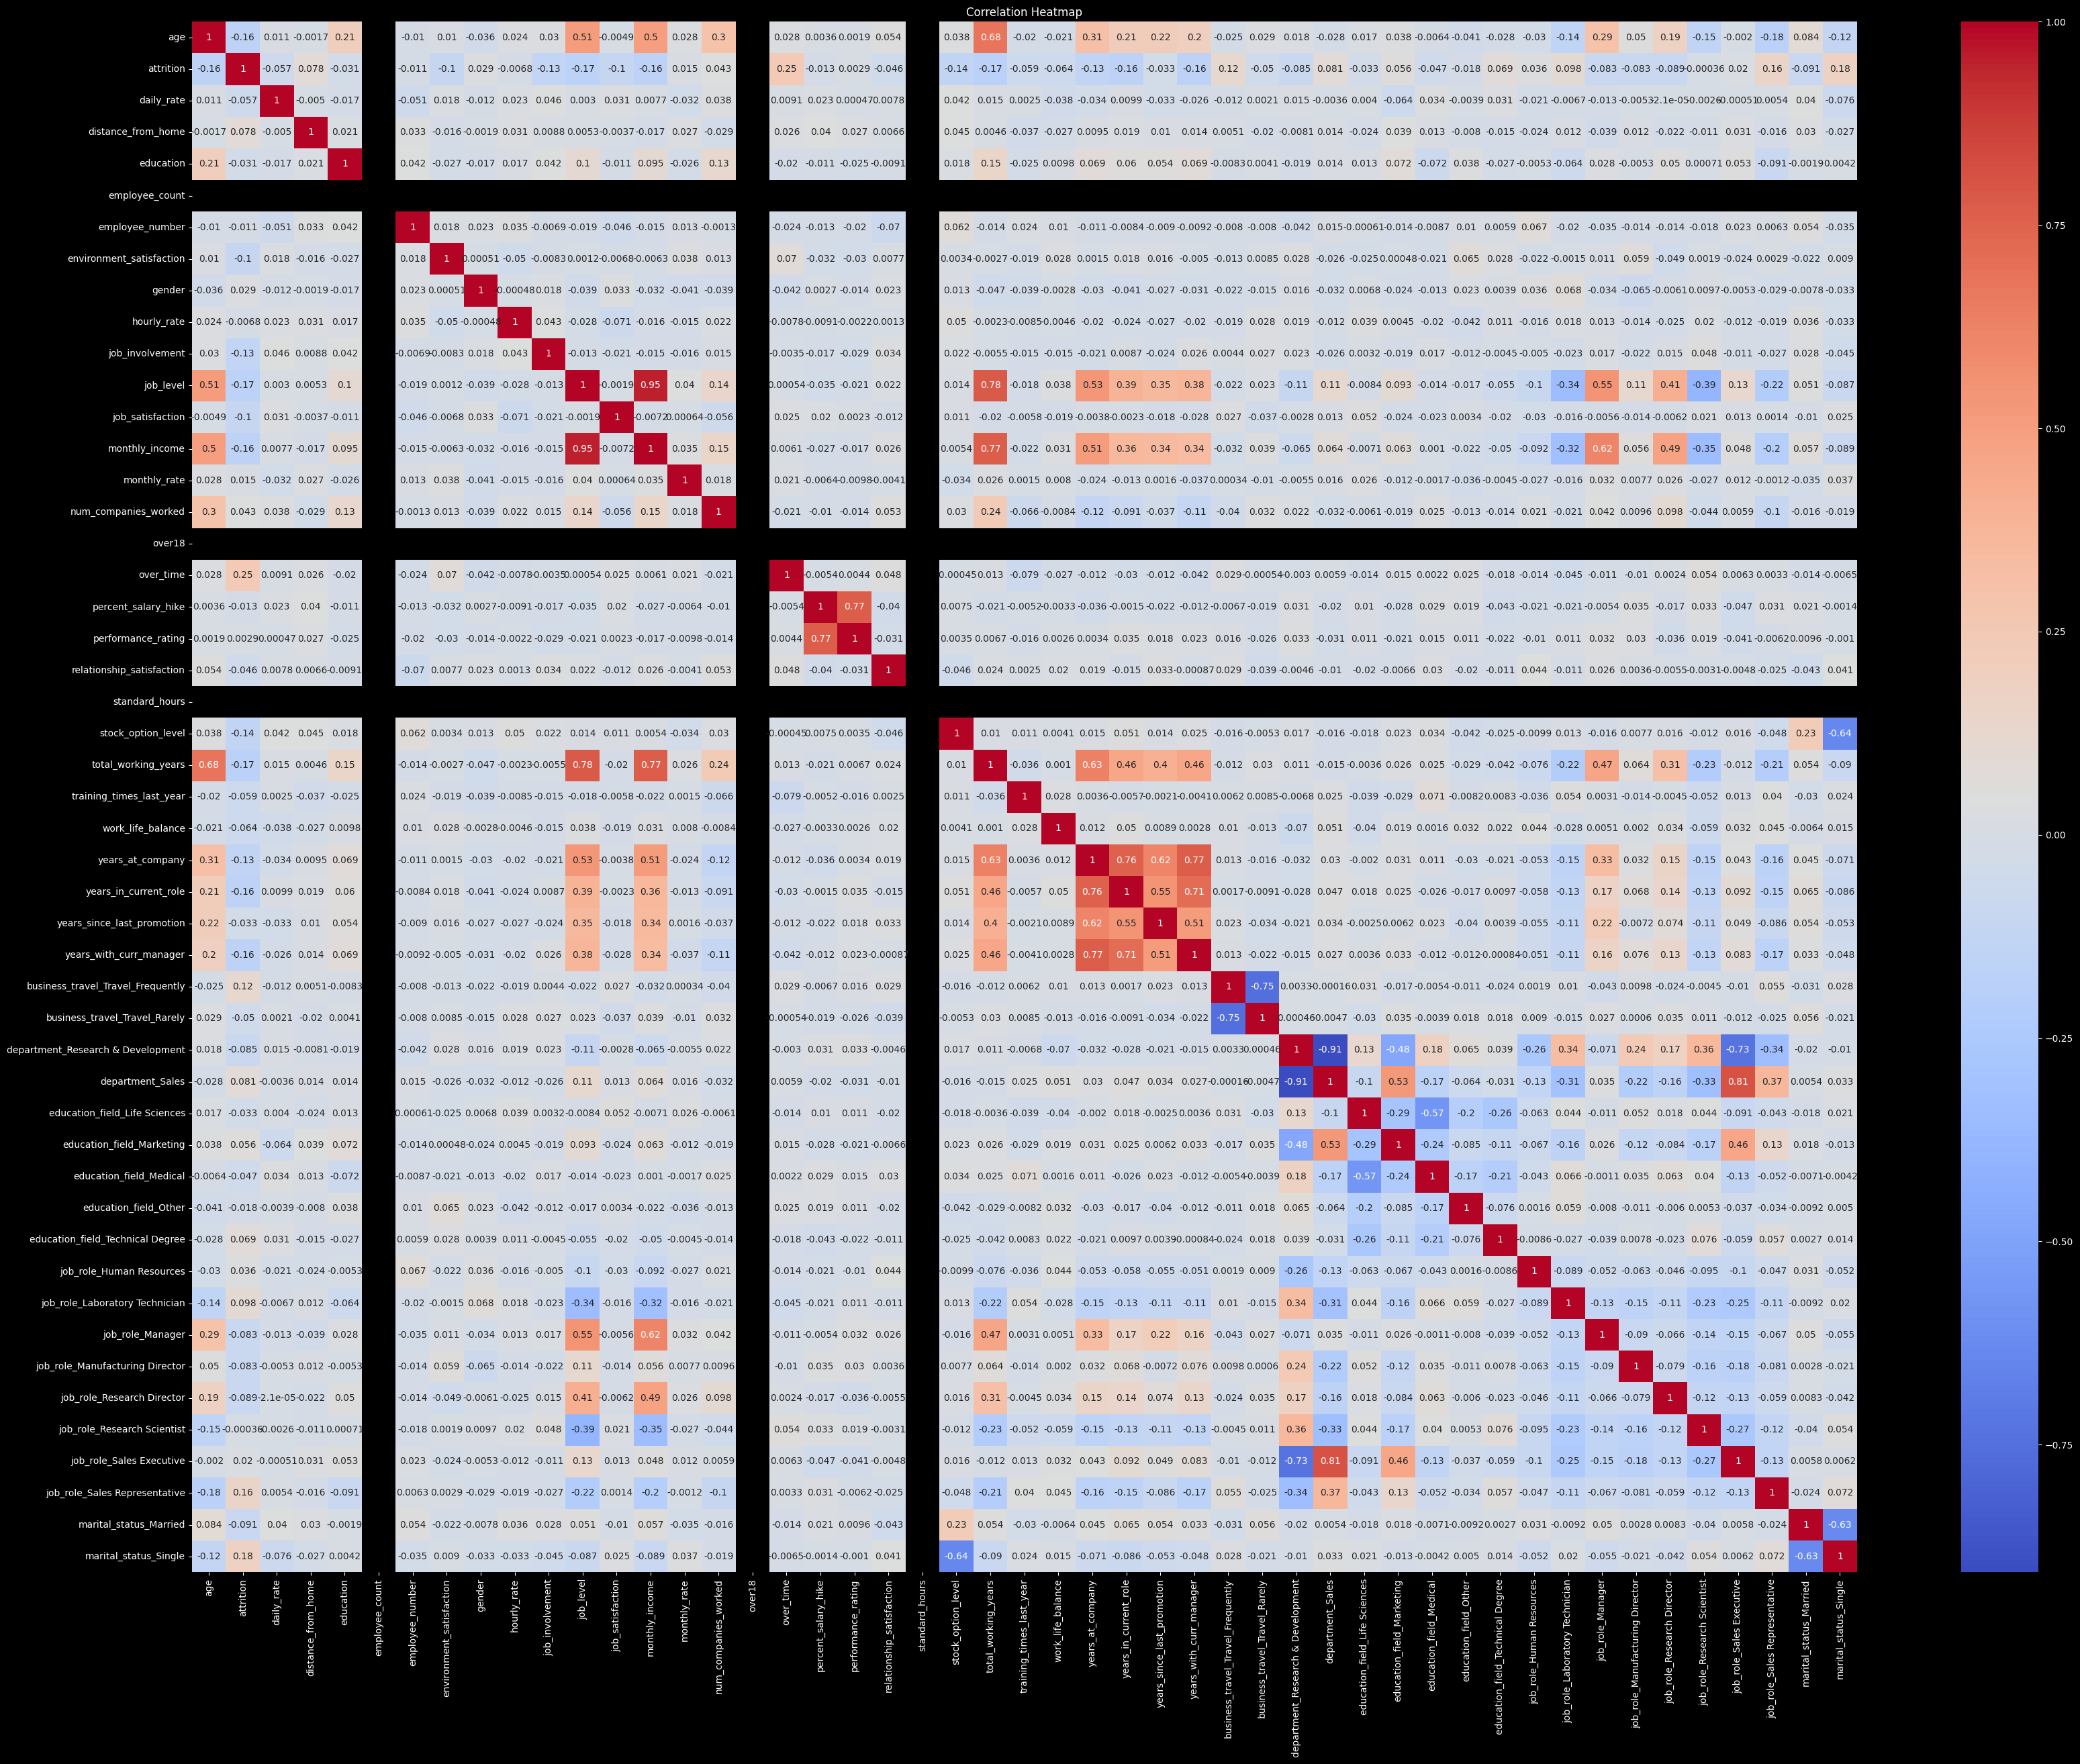

In [251]:
# Correlation matrix : Heatmap
plt.figure(figsize=(40, 30))
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [252]:
attrition_rate = df['attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


C:\Users\KALYANI\AppData\Local\Temp\ipykernel_13752\3620706911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attrition', data=df, palette='Set1')


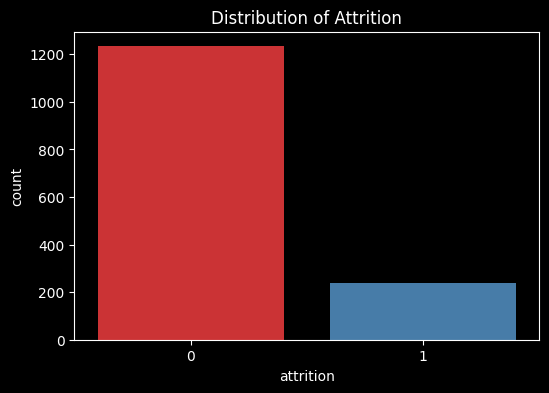

In [253]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='attrition', data=df, palette='Set1')
plt.title('Distribution of Attrition')
plt.show()

* Attrition Rate: The percentage of employees leaving the company.
83.88% of employees stayed with the company, while 16.12% of employees left (attrition)

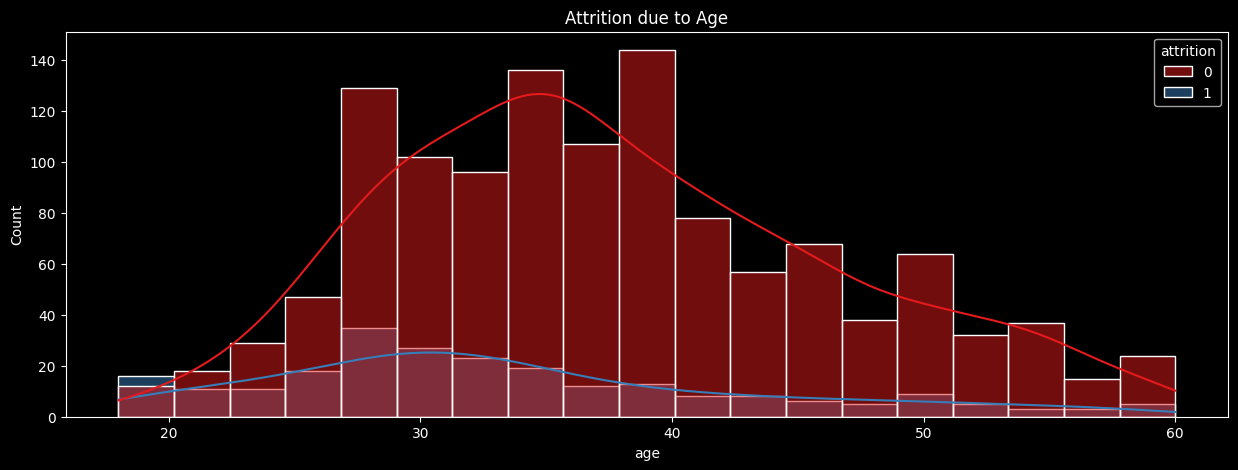

In [254]:
# Attrition due to Age
plt.figure(figsize=(15, 5))
sns.histplot(df, x='age', hue='attrition', kde=True, palette='Set1')
plt.title('Attrition due to Age')
plt.show()

C:\Users\KALYANI\AppData\Local\Temp\ipykernel_13752\2892076032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y='years_at_company', data=df, palette='Set2')


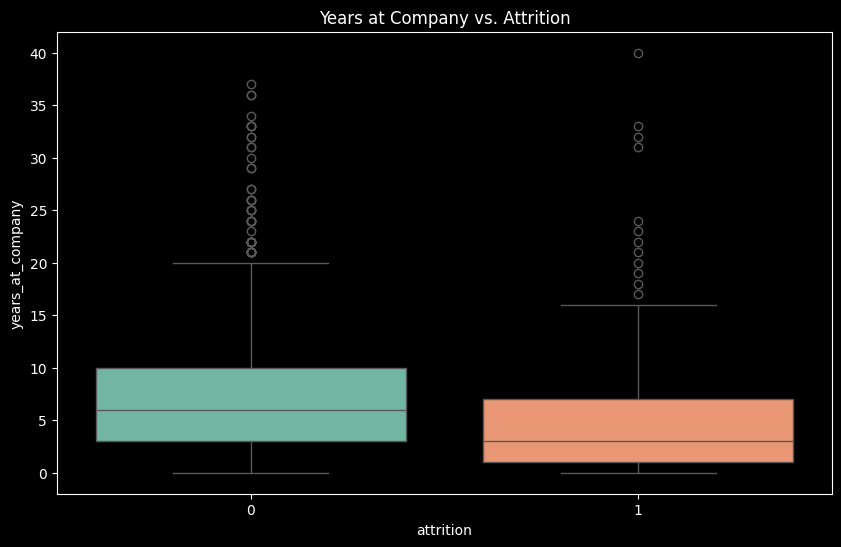

In [255]:
# Attrition due to YearsAtCompany
plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='years_at_company', data=df, palette='Set2')
plt.title("Years at Company vs. Attrition")
plt.show()

C:\Users\KALYANI\AppData\Local\Temp\ipykernel_13752\2627834372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y='distance_from_home', data=df, palette='Set3')


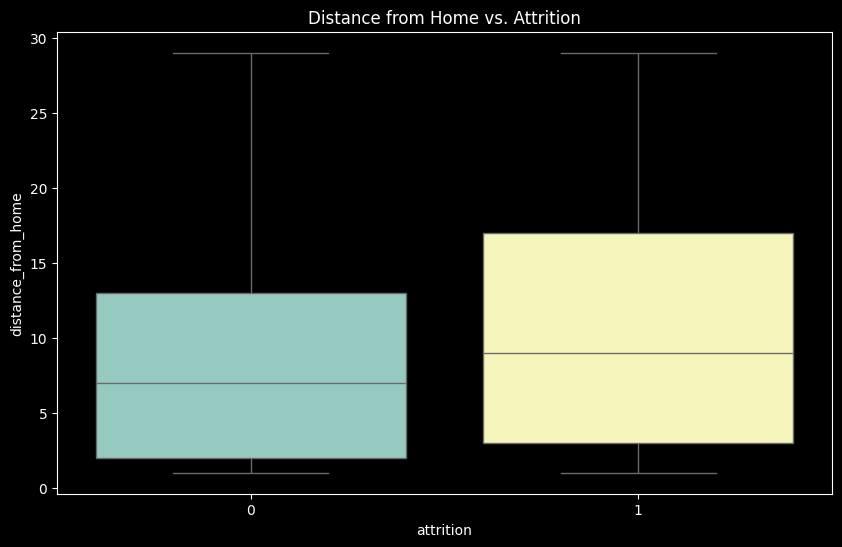

In [256]:
# Attrition due to DistanceFromHome
plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='distance_from_home', data=df, palette='Set3')
plt.title("Distance from Home vs. Attrition")
plt.show()

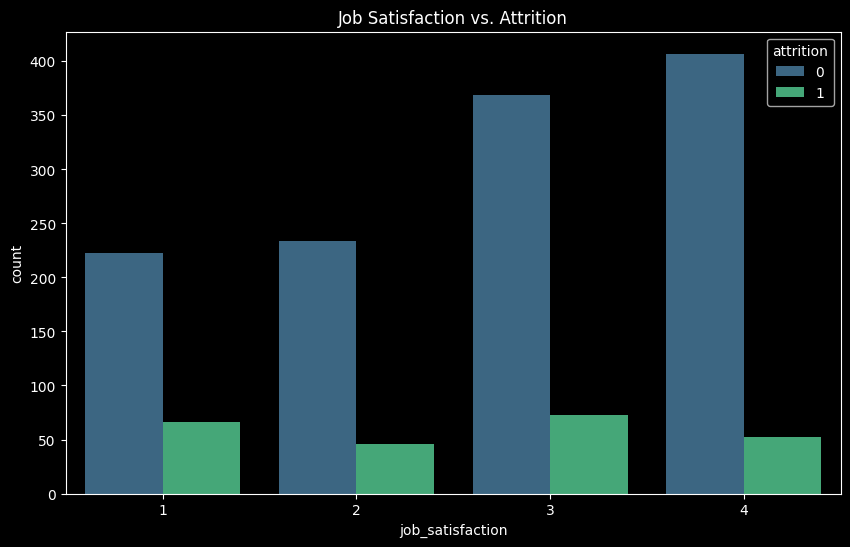

In [257]:
# Attrition due to JobSatisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='job_satisfaction', hue='attrition', data=df, palette='viridis')
plt.title("Job Satisfaction vs. Attrition")
plt.show()

C:\Users\KALYANI\AppData\Local\Temp\ipykernel_13752\1538903689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y='monthly_income', data=df, palette='coolwarm')


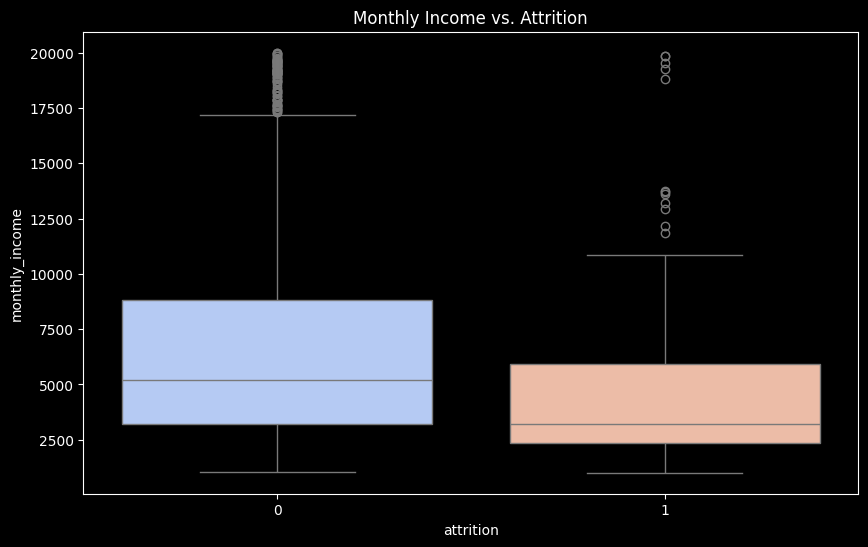

In [258]:
# Attrition due to MonthlyIncome
plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='monthly_income', data=df, palette='coolwarm')
plt.title("Monthly Income vs. Attrition")
plt.show()

C:\Users\KALYANI\AppData\Local\Temp\ipykernel_13752\1461286732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y='years_with_curr_manager', data=df, palette='bone')


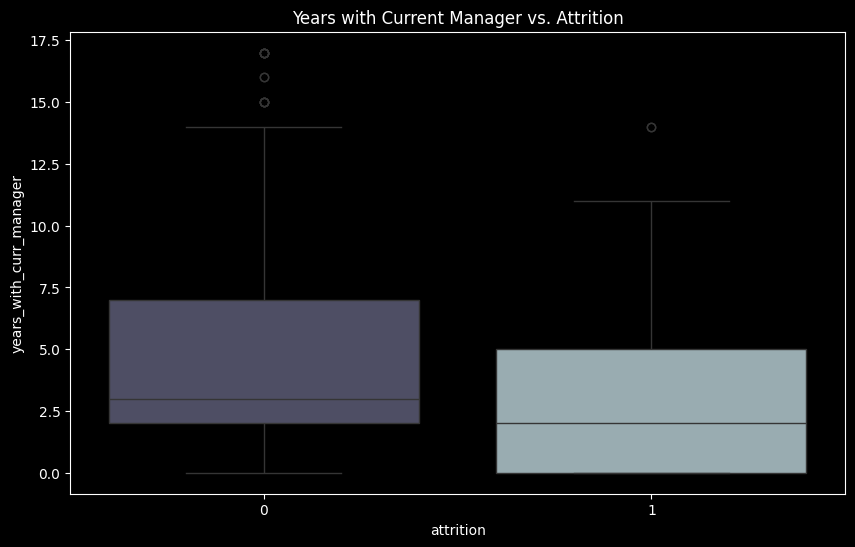

In [259]:
# Attrition due to YearsWithCurrManager
plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='years_with_curr_manager', data=df, palette='bone')
plt.title("Years with Current Manager vs. Attrition")
plt.show()

### Plot the Attrition vs Years (Since Last Promotion) using crosstab and bar plot for better visualization of the data distribution

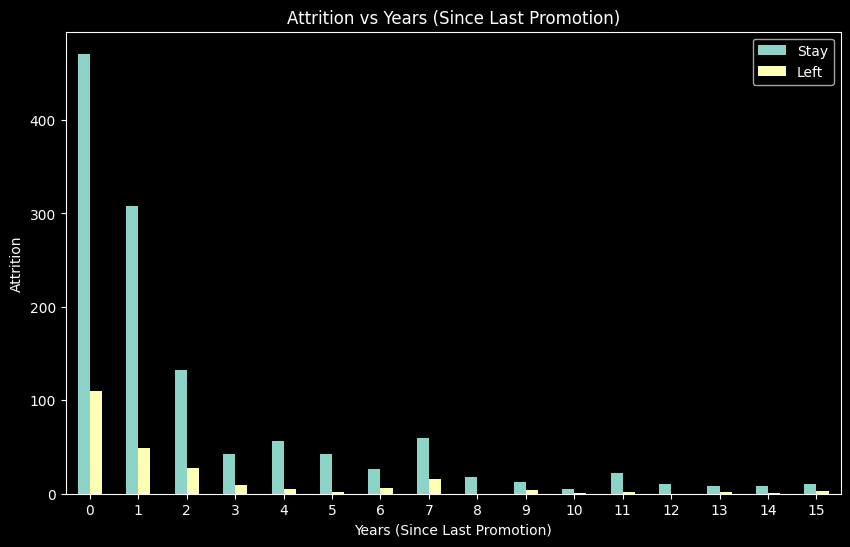

In [260]:
# Create a plot for crosstab
pd.crosstab(df['years_since_last_promotion'], df['attrition']).plot(kind="bar", figsize=(10, 6))
plt.title("Attrition vs Years (Since Last Promotion)")
plt.xlabel("Years (Since Last Promotion)")
plt.ylabel("Attrition")
plt.legend(["Stay", "Left"])
plt.xticks(rotation=0)
plt.show()

<Axes: title={'center': 'Count of different gender'}, xlabel='gender'>

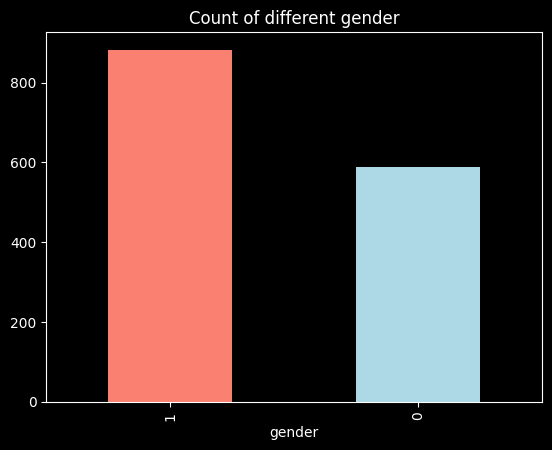

In [261]:
df['gender'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'], title="Count of different gender")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

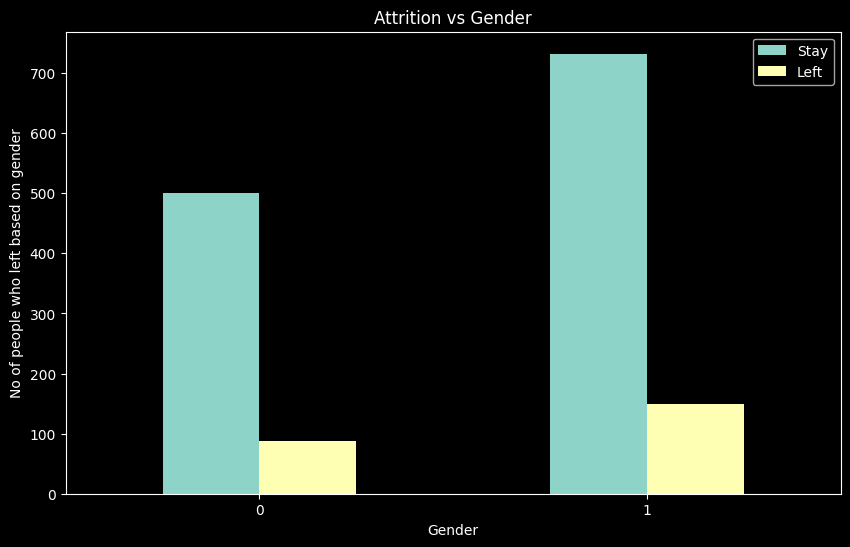

In [262]:
# Plot the Attrition vs Gender using crosstab and bar plot for better visualization of the data distribution 
df.columns = df.columns.str.strip()

# Create a plot for crosstab
pd.crosstab(df['gender'], df['attrition']).plot(kind="bar", figsize=(10, 6))
plt.title("Attrition vs Gender")
plt.xlabel("Gender")
plt.ylabel("No of people who left based on gender")
plt.legend(["Stay", "Left"])
plt.xticks(rotation=0)

# Findings Insights

Based on the visualizations provided, here are some key insights:

1. **Attrition Rate**:
     - The overall attrition rate is calculated and displayed.

2. **Attrition due to Age**:
     - Younger employees tend to have higher attrition rates.

3. **Years at Company vs. Attrition**:
     - Employees with fewer years at the company are more likely to leave.

4. **Distance from Home vs. Attrition**:
     - Employees living farther from the workplace tend to have higher attrition rates.

5. **Job Satisfaction vs. Attrition**:
     - Lower job satisfaction is associated with higher attrition rates.

6. **Monthly Income vs. Attrition**:
     - Employees with lower monthly incomes are more likely to leave.

7. **Years with Current Manager vs. Attrition**:
     - Employees with fewer years with their current manager tend to have higher attrition rates.

8. **Years Since Last Promotion vs. Attrition**:
     - Employees who have not been promoted for a long time are more likely to leave.

These insights can help in identifying key factors contributing to employee attrition and formulating strategies to address them.

# Model Selection And Model Evaluation

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [264]:
# Encode categorical variables
df['attrition'] = LabelEncoder().fit_transform(df['attrition'])

In [265]:
# Select relevant features
X = df[['age', 'years_at_company', 'monthly_income']]
y = df['attrition']

In [266]:
X.sample()

,age,years_at_company,monthly_income
851,56,5,19943


In [267]:
y.sample()

362    0
Name: attrition, dtype: int64

In [268]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 3), (294, 3), (1176,), (294,))

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [270]:
models = {
     'Logistic Regression' : LogisticRegression(random_state=42),
     'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
     'Random Forest Classifier' : RandomForestClassifier(random_state=42),
     'Decision Tree Classifier' : DecisionTreeClassifier(random_state=42),
     'Naive Bayes' : GaussianNB(),
     'K-Nearest Neighbors' : KNeighborsClassifier(n_neighbors=5),
     'Support Vector Machine' : svm.SVC(random_state=42, probability=True)
}

In [271]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [272]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_imputed[:5]

array([[2.400e+01, 1.000e+00, 2.296e+03],
       [1.800e+01, 0.000e+00, 1.051e+03],
       [2.900e+01, 3.000e+00, 6.931e+03],
       [3.900e+01, 5.000e+00, 5.295e+03],
       [3.100e+01, 1.000e+01, 4.197e+03]])

In [273]:
def evaluate_model(model, X_test, y_test):
     model_name = type(model).__name__
     model.fit(X_train_imputed, y_train)
     y_train_pred = model.predict(X_train_imputed)
     y_test_pred = model.predict(X_test_imputed)
     score_train = accuracy_score(y_train, y_train_pred)
     score_test = accuracy_score(y_test, y_test_pred)
     accuracy_train = "[%s] training data accuracy is : %f" % (model_name, score_train)
     accuracy_test = "[%s] test data accuracy is : %f" % (model_name, score_test)
     roc_auc_test = roc_auc_score(y_test, y_test_pred)
     roc_auc_train = cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='roc_auc').mean()
     confusion = confusion_matrix(y_test, y_test_pred)
     classification = classification_report(y_test, y_test_pred)
     return accuracy_train, accuracy_test, roc_auc_test, roc_auc_train, confusion, classification

In [274]:
for model_name, model in models.items():
     accuracy_train, accuracy_test, roc_auc_test, roc_auc_train, confusion, classification = evaluate_model(model, X_test_imputed, y_test)
     
     print(f'Model: {model_name}\n')
     print('_'*40,'\n')
     print(f'Confusion Matrix: \n{confusion}\n')
     print(f'Accuracy:\n {accuracy_train}, \n{accuracy_test}\n')
     print(f'ROC AUC: {roc_auc_test}\n')
     print(f'Classification Report:\n{classification}\n')
     print('='*100)

e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Model: Logistic Regression

________________________________________ 

Confusion Matrix: 
[[255   0]
 [ 39   0]]

Accuracy:
 [LogisticRegression] training data accuracy is : 0.831633, 
[LogisticRegression] test data accuracy is : 0.867347

ROC AUC: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294


Model: Gradient Boosting

________________________________________ 

Confusion Matrix: 
[[250   5]
 [ 37   2]]

Accuracy:
 [GradientBoostingClassifier] training data accuracy is : 0.873299, 
[GradientBoostingClassifier] test data accuracy is : 0.857143

ROC AUC: 0.5158371040723981

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98 

e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [275]:
# Collect model scores
model_scores = {model_name: accuracy_score(y_test, model.predict(X_test_imputed)) for model_name, model in models.items()}
roc_auc_scores = {model_name: roc_auc_score(y_test, model.predict_proba(X_test_imputed)[:, 1]) for model_name, model in models.items()}

# Create a DataFrame from model scores
model_compare = pd.DataFrame({
	'Accuracy': model_scores,
	'ROC AUC Score': roc_auc_scores
})
model_compare

,Accuracy,ROC AUC Score
Logistic Regression,0.867347,0.678431
Gradient Boosting,0.857143,0.624887
Random Forest Classifier,0.836735,0.480895
Decision Tree Classifier,0.714286,0.466063
Naive Bayes,0.870748,0.686174
K-Nearest Neighbors,0.846939,0.492810
Support Vector Machine,0.867347,0.485571


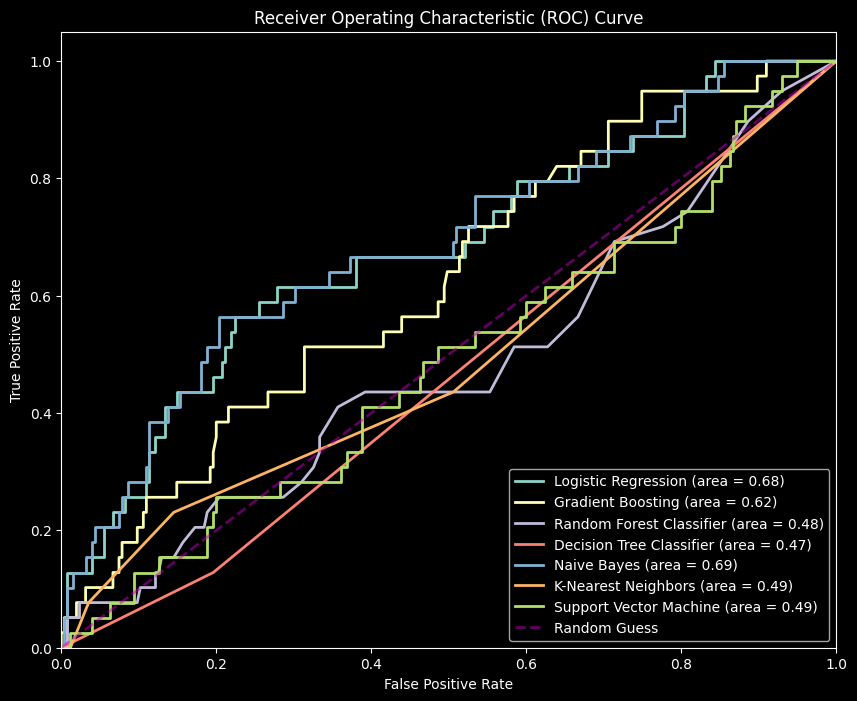

In [276]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(models, X_test, y_test):
     plt.figure(figsize=(10, 8))
     for model_name, model in models.items():
          y_pred_proba = model.predict_proba(X_test)[:, 1]
          fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
          roc_auc = auc(fpr, tpr)
          plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')
     
     plt.plot([0, 1], [0, 1], color='m', lw=2, linestyle='--', label='Random Guess', alpha=0.5)
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')
     plt.title('Receiver Operating Characteristic (ROC) Curve')
     plt.legend(loc='lower right')
     plt.show()

# Impute missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Plot ROC curves for all models
plot_roc_curve(models, X_test_imputed, y_test)

In [277]:
from sklearn.metrics import roc_auc_score

best_model_name = None
best_auc = 0

for model_name, model in models.items():
     y_pred_proba = model.predict_proba(X_test_imputed)[:, 1]
     auc = roc_auc_score(y_test, y_pred_proba)
     if auc > best_auc:
          best_auc = auc
          best_model_name = model_name

print(f'\nBest model: {best_model_name} with AUC: {best_auc:.4f}')


Best model: Naive Bayes with AUC: 0.6862


# Feature Importance

In [278]:
# Naive Bayes

# Train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_imputed, y_train)

print(X_train.columns, '\n', X_train.columns)

# Get the mean of each feature per class
feature_dict = dict(zip(X_train.columns, nb_model.theta_[0]))
feature_dict


Index(['age', 'years_at_company', 'monthly_income'], dtype='object') 
 Index(['age', 'years_at_company', 'monthly_income'], dtype='object')


{'age': np.float64(37.40899795501022),
 'years_at_company': np.float64(7.293456032719837),
 'monthly_income': np.float64(6720.9693251533745)}

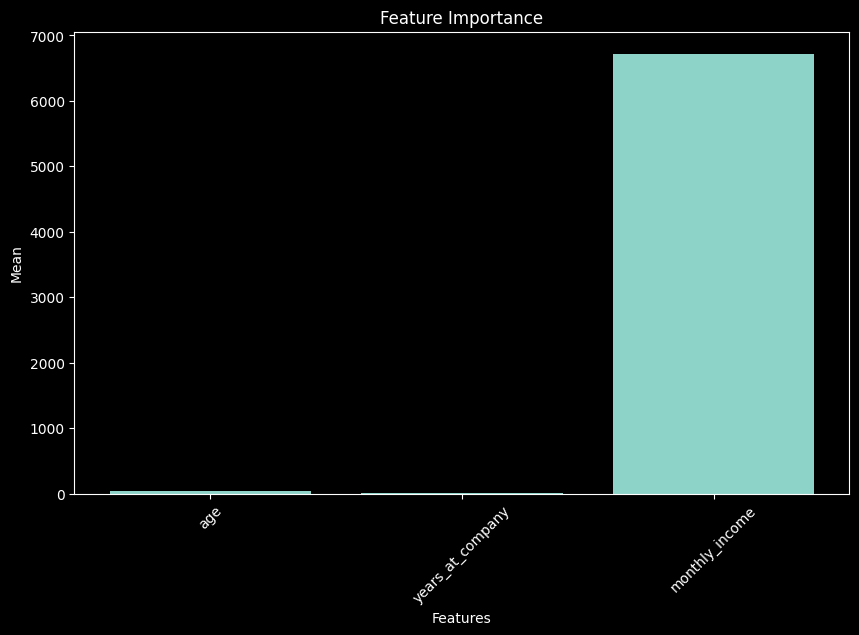

In [279]:
# Plot the distribution of the features importance

plt.figure(figsize=(10, 6))
plt.bar(feature_dict.keys(), feature_dict.values())
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Mean")
plt.xticks(rotation=45)
plt.show()


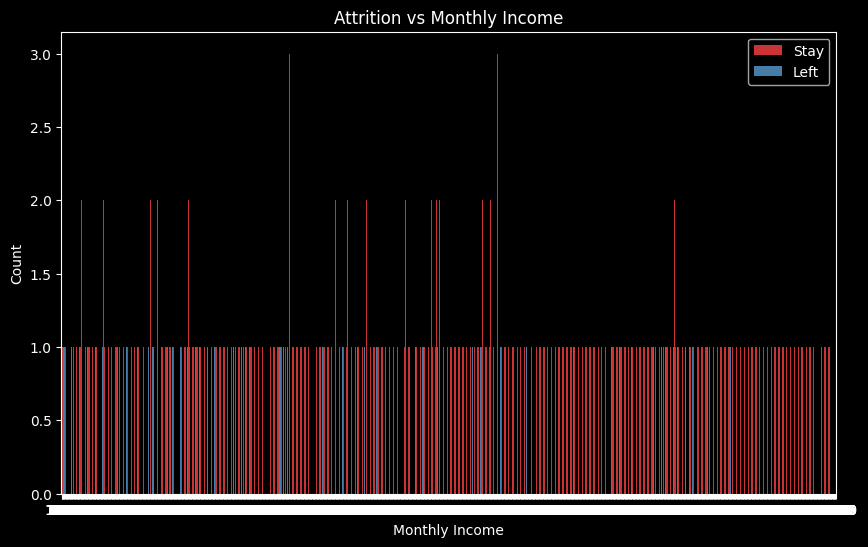

In [280]:
# Plot the relation between attrition and business travel
plt.figure(figsize=(10, 6))
sns.countplot(x='monthly_income', hue='attrition', data=df, palette='Set1')
plt.title('Attrition vs Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(['Stay', 'Left'])
plt.show()

* 'Monthly Income' column has Highest feature importance

# Build Employee Attrition Prediction System with Pickle file

In [281]:
import pickle

# Save the best model
if best_model_name is not None:
    with open('best_model.pkl', 'wb') as file:
        pickle.dump(models[best_model_name], file)
else:
    print("No best model found to save.")

In [282]:
with open('best_model.pkl', 'rb') as file:
	best_model = pickle.load(file)

In [283]:
df = pd.read_csv('greendestination.csv')
new_df = df.sample(1)
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
477,50,No,Travel_Frequently,1246,Human Resources,3,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7


In [284]:
import pickle

# Load the model
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Define feature names
feature_names = X.columns

def predict_churn(input_data):
     # Ensure the input data is in the correct format
     input_df = pd.DataFrame([input_data], columns=feature_names)
     
     # Impute missing values
     input_df_imputed = imputer.transform(input_df)
     
     # Make prediction using the loaded model
     prediction = loaded_model.predict(input_df_imputed)
     
     # Return the prediction result
     return prediction[0]

# Example input data and predicted data
def df_to_dict(df):
     return df[["Age", "MonthlyIncome", "YearsAtCompany"]].to_dict(orient="records")[0]
input_data = df_to_dict(new_df)
print(input_data)

predicted_data = new_df['Attrition']
print(predicted_data)

# Predict churn for the example input
prediction = predict_churn(input_data)
print(f'\nAttrition Prediction: {prediction}')

{'Age': 50, 'MonthlyIncome': 18200, 'YearsAtCompany': 32}
477    No
Name: Attrition, dtype: object

Attrition Prediction: 0


Based on the analysis of the employee attrition data, here are the key points:

1. **Attrition Rate**:
     - The overall attrition rate is calculated and displayed, showing the percentage of employees who left the company.

2. **Attrition due to Age**:
     - Younger employees tend to have higher attrition rates, indicating that age is a significant factor in employee turnover.

3. **Years at Company vs. Attrition**:
     - Employees with fewer years at the company are more likely to leave, suggesting that newer employees are at a higher risk of attrition.

4. **Distance from Home vs. Attrition**:
     - Employees living farther from the workplace tend to have higher attrition rates, highlighting the impact of commute distance on employee retention.

5. **Job Satisfaction vs. Attrition**:
     - Lower job satisfaction is associated with higher attrition rates, emphasizing the importance of job satisfaction in retaining employees.

6. **Monthly Income vs. Attrition**:
     - Employees with lower monthly incomes are more likely to leave, indicating that compensation plays a crucial role in employee retention.

7. **Years with Current Manager vs. Attrition**:
     - Employees with fewer years with their current manager tend to have higher attrition rates, suggesting that managerial relationships influence employee turnover.

8. **Years Since Last Promotion vs. Attrition**:
     - Employees who have not been promoted for a long time are more likely to leave, pointing to the importance of career advancement opportunities in retaining employees.

9. **Gender vs. Attrition**:
     - The analysis shows the distribution of attrition across different genders, providing insights into gender-specific attrition trends.

10. **Model Evaluation**:
      - Various machine learning models were evaluated to predict employee attrition. The best model was identified based on its ROC AUC score, and the model was saved for future predictions.

11. **Feature Importance**:
      - The analysis identified 'Monthly Income' as the most important feature influencing employee attrition, highlighting the significance of financial compensation in employee retention.

12. **Prediction System**:
      - A prediction system was built using the best model to predict employee attrition based on key features such as age, years at the company, and monthly income.

These insights can help the company identify key factors contributing to employee attrition and develop strategies to improve employee retention.